# Análisis de constantes de filtrado


En esta notebook, haremos un análisis de las constantes para filtrar palabras y usuarios. En el trabajo original utilizamos 40 ocurrencias y 5 usuarios para filtrar, pero puede que no sea el mejor para este nuevo dataset.





In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../output/listado_personas.csv", index_col=0)

print("Total de palabras: {}".format(df.shape[0]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Total de palabras: 85701


Agrego la serie de puntos de la suma acumulada de frecuencias

In [26]:
occ_columns = [c for c in df.columns if "ocurrencias" in c]

X = -np.sort(-df[occ_columns].values)

cumsum = (X / X.sum(axis=1).reshape(-1, 1)).cumsum(axis=1)


cs = pd.DataFrame(cumsum, columns=range(1, 24))
cs["palabra"] = df.index
cs.set_index("palabra", inplace=True)


extended_df = pd.concat([df, cs], axis=1)

Ahora, veamos lo siguiente: para las primeras 1000, 2000, 3000, y 5000 palabras ¿cuál es la media de la frecuencia relativa acumulada usando las $i$ provincias con mayor masa?

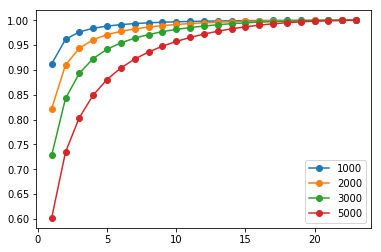

In [24]:
values = {}
for limit in [1000, 2000, 3000, 5000, 20000]:
    values[limit] = extended_df[:limit][list(range(1,24))].mean()
    
pd.DataFrame(values).plot(marker='o')